In [ ]:
import random
import math
import matplotlib.pyplot as plt

In [ ]:
n = 1000
seed = int(0.05*n)
grid_size = 500
beta = 0.3
gamma = 0.3
susTOexpDISTANCE = 40
movementDISTANCE = 100

In [ ]:
coordinates = []
for i in range(n):
    x = random.randint(0, grid_size)
    y = random.randint(0, grid_size)
    coordinates.append([x, y])

t = 0
t_counts = []

susceptible = [i for i in  range(n)]
exposed = []
infected = []
recovered = []

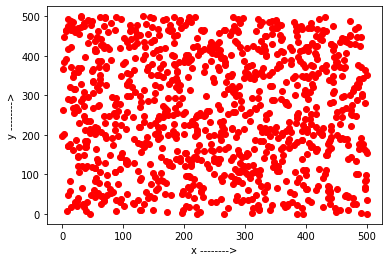

In [ ]:
plt.plot([i[0] for i in coordinates], [i[1] for i in coordinates], 'ro')
plt.xlabel('x -------->')
plt.ylabel('y -------->')
plt.show()

In [ ]:
distance = [[0 for i in range(n)] for i in range(n)]
for i in range(n) :
    for j in range(n) :
        distance[i][j] = math.sqrt(pow(coordinates[i][0] - coordinates[j][0], 2) + pow(coordinates[i][1] - coordinates[j][1], 2))

In [ ]:
for i in range(seed) :
    temp = random.randint(0, n-1)
    while(temp in infected) :
        temp = random.randint(0, n-1)
    infected.append(temp)
    susceptible.remove(temp)

In [ ]:
for i in infected :
    for j in range(n) :
        if(distance[i][j] <= susTOexpDISTANCE) :
            if(j in susceptible) :
                susceptible.remove(j)
                exposed.append(j)

t_counts.append([len(susceptible), len(exposed), len(infected), len(recovered)])

In [ ]:
while(True) :
    t += 1

    for i in infected :
        p = random.random()
        if p < gamma :
            infected.remove(i)
            recovered.append(i)

    for i in exposed :
        p = random.random()
        if p > beta :
            exposed.remove(i)
            infected.append(i)
        else :
            exposed.remove(i)
            recovered.append(i)

    for i in range(n) :
        dx = random.randint(-1*movementDISTANCE, movementDISTANCE)
        dy = random.randint(-1*movementDISTANCE, movementDISTANCE)
        coordinates[i][0] += dx
        coordinates[i][1] += dy

    for i in range(n) :
        for j in range(n) :
            distance[i][j] = math.sqrt(pow(coordinates[i][0] - coordinates[j][0], 2) + pow(coordinates[i][1] - coordinates[j][1], 2))

    for i in infected :
        for j in range(n) :
            if(distance[i][j] <= susTOexpDISTANCE) :
                if(j in susceptible) :
                    susceptible.remove(j)
                    exposed.append(j)

    t_counts.append([len(susceptible), len(exposed), len(infected), len(recovered)])
    if(t_counts[t] == t_counts[t-1]) :
        break

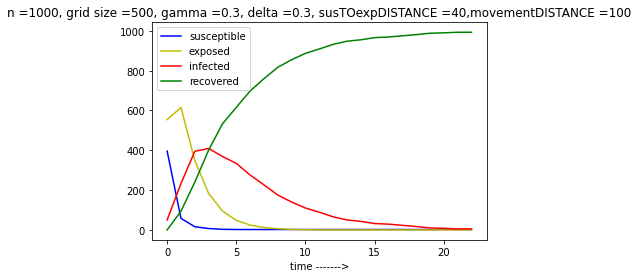

In [ ]:
plt.plot([i for i in range(len(t_counts))], [i[0] for i in t_counts], 'b', label='susceptible')
plt.plot([i for i in range(len(t_counts))], [i[1] for i in t_counts], 'y', label='exposed')
plt.plot([i for i in range(len(t_counts))], [i[2] for i in t_counts], 'r', label='infected')
plt.plot([i for i in range(len(t_counts))], [i[3] for i in t_counts], 'g', label='recovered')

plt.legend()
title = "n =" + str(n) + ", grid size =" + str(grid_size) + ", gamma =" + str(beta) + ", delta =" + str(gamma) + ", susTOexpDISTANCE =" + str(susTOexpDISTANCE) + ",movementDISTANCE =" + str(movementDISTANCE)
plt.title(title)
plt.xlabel('time ------->')
plt.show()